In [1]:
import os
import glob
import matplotlib.pyplot as plt

import pickle
import pandas as pd

folder_path = "/home/shakyaa/data/river_discharge/somalia/updated_swalim_20231222"
# Get a list of all files in the folder
file_list = os.listdir(folder_path)

In [2]:
# Read each file
stations = []
for file_name in file_list:
    if file_name.startswith("jb") or file_name.startswith("sh"):
        stations.append(file_name)

# Create a dataframe for each stations

In [3]:
stations

['jb001-Luuq',
 'jb002-Bardheere',
 'jb009-Dollow',
 'sh001-Belet_Weyne',
 'sh002-Bulo_Burti',
 'sh003-Mahadey_Weyne',
 'sh004-jowhar']

In [4]:
station_info = [(station, station.split('-')[0], station.split('-')[1].capitalize()) for station in stations]
station_info

[('jb001-Luuq', 'jb001', 'Luuq'),
 ('jb002-Bardheere', 'jb002', 'Bardheere'),
 ('jb009-Dollow', 'jb009', 'Dollow'),
 ('sh001-Belet_Weyne', 'sh001', 'Belet_weyne'),
 ('sh002-Bulo_Burti', 'sh002', 'Bulo_burti'),
 ('sh003-Mahadey_Weyne', 'sh003', 'Mahadey_weyne'),
 ('sh004-jowhar', 'sh004', 'Jowhar')]

In [5]:
station_info_df = pd.DataFrame(station_info, columns=['station','station_id', 'station_name'])
station_info_df['river_name'] = station_info_df['station_id'].apply(lambda x: 'Juba' if x.startswith('jb') else 'Shabelle')

station_info_df


,station,station_id,station_name,river_name
0,jb001-Luuq,jb001,Luuq,Juba
1,jb002-Bardheere,jb002,Bardheere,Juba
2,jb009-Dollow,jb009,Dollow,Juba
3,sh001-Belet_Weyne,sh001,Belet_weyne,Shabelle
4,sh002-Bulo_Burti,sh002,Bulo_burti,Shabelle
5,sh003-Mahadey_Weyne,sh003,Mahadey_weyne,Shabelle
6,sh004-jowhar,sh004,Jowhar,Shabelle


In [6]:
import pandas as pd

main_df = pd.read_csv(os.path.join(folder_path,'main.csv'))
main_df

,Unnamed: 0,Station Number,Station Name,River,Status,First Date,Last Update,Level,Moderate Flood Risk,High Flood Risk,Bank Full,Maximum Depth,Maximum Width,Maximum Flow,Elevation,Latitude,Longitude
0,NaN,JB001,Luuq,Juba,Functional,"Jan. 1, 1951","Dec. 22, 2023",2.06m,5.5m,6.0m,7.0m,9.0m,140.0m,1800.0m,140.0,42.542640,3.79172
1,NaN,JB002,Bardheere,Juba,Functional,"Jan. 1, 1963","Dec. 22, 2023",0.0m,7.4m,8.2m,10.4m,8.0m,100.0m,1800.0m,87.0,42.281150,2.33989
2,NaN,JB009,Dollow,Juba,Functional,"Jan. 1, 2015","Dec. 22, 2023",2.44m,4.5m,5.0m,6.0m,-,-,-,177.0,42.079382,4.18777
3,NaN,JB010,Bualle,Juba,Functional,"Jan. 1, 2008","Dec. 22, 2023",6.8m,9.0m,10.0m,12.0m,-,-,-,51.0,42.573170,1.24477
4,NaN,SH001,Belet Weyne,Shabelle,Functional,"Jan. 1, 1963","Dec. 22, 2023",6.3m,6.5m,7.3m,8.3m,7.0m,44.0m,500.0m,182.0,45.205960,4.73598
5,NaN,SH002,Bulo Burti,Shabelle,Functional,"Jan. 1, 1963","Dec. 22, 2023",8.0m,6.5m,7.2m,8.0m,8.0m,42.0m,-,133.0,45.567270,3.85702
6,NaN,SH004,Jowhar,Shabelle,Functional,"Jan. 1, 1999","Dec. 22, 2023",4.9m,5.0m,5.25m,5.5m,5.5m,33.0m,-,105.0,45.504860,2.77872
7,NaN,SH003,Mahadey Weyne,Shabelle,Non Functional,"Jan. 1, 1963","Dec. 31, 1990",-,-,-,-,-,32.0m,-,115.0,45.530380,2.97098


In [7]:
csv_files = glob.glob(folder_path + '/**/*.csv', recursive=True)
subset_csv_files = [file for file in csv_files if any(keyword in file for keyword in ['water', 'level', 'flow', 'data'])]
subset_csv_files

['/home/shakyaa/data/river_discharge/somalia/updated_swalim_20231222/main.csv',
 '/home/shakyaa/data/river_discharge/somalia/updated_swalim_20231222/jb001-Luuq/jb001_flow_data.csv',
 '/home/shakyaa/data/river_discharge/somalia/updated_swalim_20231222/jb001-Luuq/jb001_water_level.csv',
 '/home/shakyaa/data/river_discharge/somalia/updated_swalim_20231222/jb002-Bardheere/jb002_flow_data.csv',
 '/home/shakyaa/data/river_discharge/somalia/updated_swalim_20231222/jb002-Bardheere/jb002_water_level.csv',
 '/home/shakyaa/data/river_discharge/somalia/updated_swalim_20231222/jb009-Dollow/jb009_flow_data.csv',
 '/home/shakyaa/data/river_discharge/somalia/updated_swalim_20231222/jb009-Dollow/jb009_level_data.csv',
 '/home/shakyaa/data/river_discharge/somalia/updated_swalim_20231222/sh001-Belet_Weyne/snrfa_flow_data.csv',
 '/home/shakyaa/data/river_discharge/somalia/updated_swalim_20231222/sh001-Belet_Weyne/snrfa_level_data.csv',
 '/home/shakyaa/data/river_discharge/somalia/updated_swalim_20231222/s

In [8]:
import pandas as pd

ts_dict = dict()
for file_path in subset_csv_files:
    df = pd.read_csv(file_path)

    name = os.path.splitext(os.path.basename(file_path))[0]
    ts_dict[name] = df


In [9]:
ts_dict.keys()

dict_keys(['main', 'jb001_flow_data', 'jb001_water_level', 'jb002_flow_data', 'jb002_water_level', 'jb009_flow_data', 'jb009_level_data', 'snrfa_flow_data', 'snrfa_level_data'])

In [10]:
ts_dict['main']

,Unnamed: 0,Station Number,Station Name,River,Status,First Date,Last Update,Level,Moderate Flood Risk,High Flood Risk,Bank Full,Maximum Depth,Maximum Width,Maximum Flow,Elevation,Latitude,Longitude
0,NaN,JB001,Luuq,Juba,Functional,"Jan. 1, 1951","Dec. 22, 2023",2.06m,5.5m,6.0m,7.0m,9.0m,140.0m,1800.0m,140.0,42.542640,3.79172
1,NaN,JB002,Bardheere,Juba,Functional,"Jan. 1, 1963","Dec. 22, 2023",0.0m,7.4m,8.2m,10.4m,8.0m,100.0m,1800.0m,87.0,42.281150,2.33989
2,NaN,JB009,Dollow,Juba,Functional,"Jan. 1, 2015","Dec. 22, 2023",2.44m,4.5m,5.0m,6.0m,-,-,-,177.0,42.079382,4.18777
3,NaN,JB010,Bualle,Juba,Functional,"Jan. 1, 2008","Dec. 22, 2023",6.8m,9.0m,10.0m,12.0m,-,-,-,51.0,42.573170,1.24477
4,NaN,SH001,Belet Weyne,Shabelle,Functional,"Jan. 1, 1963","Dec. 22, 2023",6.3m,6.5m,7.3m,8.3m,7.0m,44.0m,500.0m,182.0,45.205960,4.73598
5,NaN,SH002,Bulo Burti,Shabelle,Functional,"Jan. 1, 1963","Dec. 22, 2023",8.0m,6.5m,7.2m,8.0m,8.0m,42.0m,-,133.0,45.567270,3.85702
6,NaN,SH004,Jowhar,Shabelle,Functional,"Jan. 1, 1999","Dec. 22, 2023",4.9m,5.0m,5.25m,5.5m,5.5m,33.0m,-,105.0,45.504860,2.77872
7,NaN,SH003,Mahadey Weyne,Shabelle,Non Functional,"Jan. 1, 1963","Dec. 31, 1990",-,-,-,-,-,32.0m,-,115.0,45.530380,2.97098


In [11]:
ts_dict['jb001_flow_data']

,id,date,station_number,flow(m3/s)
0,179215,2023-12-22,jb001,NaN
1,179208,2023-12-21,jb001,NaN
2,179201,2023-12-20,jb001,NaN
3,179194,2023-12-19,jb001,NaN
4,179187,2023-12-18,jb001,NaN
...,...,...,...,...
26561,5,1951-01-05,jb001,NaN
26562,4,1951-01-04,jb001,NaN
26563,3,1951-01-03,jb001,NaN
26564,2,1951-01-02,jb001,NaN


<Axes: >

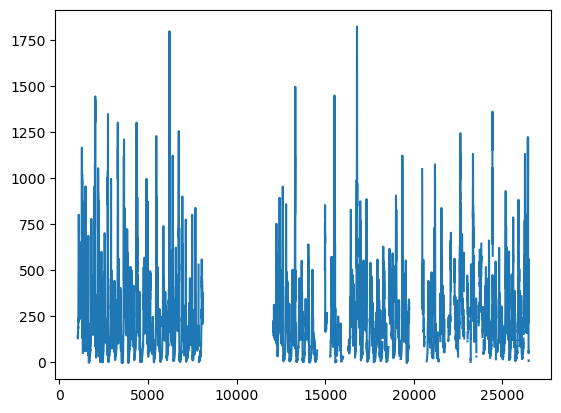

In [12]:
ts_dict['jb001_flow_data']['flow(m3/s)'].plot()

# Export to pickle

In [17]:
pickle_file_path = "../../data/ts_dict.pickle"
# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(pickle_file_path), exist_ok=True)

# Export ts_dict as a pickle file
with open(pickle_file_path, "wb") as file:
    pickle.dump(ts_dict, file)
